<a href="https://colab.research.google.com/github/ZRooker/Senior-Year-Work/blob/main/Laser_Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# create an empty DataFrame to store the maximum values
max_df = pd.DataFrame(columns=["filename", "max", "frequency"])
# loop over all the files
for i in range(1, 24):
    # read the ith file
    data = np.genfromtxt('a{}.csv'.format(i), delimiter=',', skip_header=48, dtype=str)
    # extract the second column and convert to float
    col = np.array([float(line.split(';')[1]) for line in data if len(line.split(';')) >= 2])
    col_f = np.array([float(line.split(';')[0]) for line in data if len(line.split(';')) >= 2])
    # find the maximum value after the 48th row
    max_val = np.max(col[47:])
    # get the index of the maximum value
    max_idx = np.argmax(col[47:])
    # get the corresponding value in the first column
    first_val = col_f[47 + max_idx]

    max_df = pd.concat([max_df, pd.DataFrame({"filename": [f"a{i}.csv"], "max": [max_val], "frequency": [first_val]})], ignore_index=True)

# print the DataFrame with the maximum values and first values
print(max_df)

   filename       max   frequency
0    a1.csv  0.002892  596.757568
1    a2.csv  0.003258  714.212524
2    a3.csv  0.002558  349.518890
3    a4.csv  0.003694  515.065125
4    a5.csv  0.005814  632.739746
5    a6.csv  0.005523  632.739746
6    a7.csv  0.006254  632.739746
7    a8.csv  0.011258  632.858398
8    a9.csv  0.010522  632.739746
9   a10.csv  0.028770  632.739746
10  a11.csv  0.030576  632.739746
11  a12.csv  0.060328  632.739746
12  a13.csv  0.044363  632.739746
13  a14.csv  0.019755  632.858398
14  a15.csv  0.030278  632.858398
15  a16.csv  0.044351  632.858398
16  a17.csv  0.078940  632.858398
17  a18.csv  0.062473  632.858398
18  a19.csv  0.057878  632.739746
19  a20.csv  0.044831  632.739746
20  a21.csv  0.015967  632.739746
21  a22.csv  0.013401  632.739746
22  a23.csv  0.006147  632.739746


In [6]:
# create an empty DataFrame to store the maximum values
bmax_df = pd.DataFrame(columns=["filename", "max", "frequency"])
# loop over all the files
for i in range(1, 21):
    # read the ith file
    data = np.genfromtxt('b{}.csv'.format(i), delimiter=',', skip_header=48, dtype=str)
    # extract the second column and convert to float
    col = np.array([float(line.split(';')[1]) for line in data if len(line.split(';')) >= 2])
    col_f = np.array([float(line.split(';')[0]) for line in data if len(line.split(';')) >= 2])
    # find the maximum value after the 48th row
    max_val = np.max(col[47:])
    # get the index of the maximum value
    max_idx = np.argmax(col[47:])
    # get the corresponding value in the first column
    first_val = col_f[47 + max_idx]

    bmax_df = pd.concat([bmax_df, pd.DataFrame({"filename": [f"a{i}.csv"], "max": [max_val], "frequency": [first_val]})], ignore_index=True)

# print the DataFrame with the maximum values and first values
print(bmax_df)

   filename       max   frequency
0    a1.csv  0.003923  343.575989
1    a2.csv  0.003938  559.681152
2    a3.csv  0.020271  632.739746
3    a4.csv  0.035844  632.739746
4    a5.csv  0.101422  632.739746
5    a6.csv  0.170671  632.858398
6    a7.csv  0.186101  632.858398
7    a8.csv  0.245251  632.739746
8    a9.csv  0.330854  632.739746
9   a10.csv  0.313975  632.739746
10  a11.csv  0.262101  632.739746
11  a12.csv  0.239085  632.739746
12  a13.csv  0.259141  632.739746
13  a14.csv  0.284842  632.739746
14  a15.csv  0.288547  632.739746
15  a16.csv  0.257057  632.739746
16  a17.csv  0.182029  632.739746
17  a18.csv  0.100103  632.739746
18  a19.csv  0.055907  632.739746
19  a20.csv  0.027100  632.739746


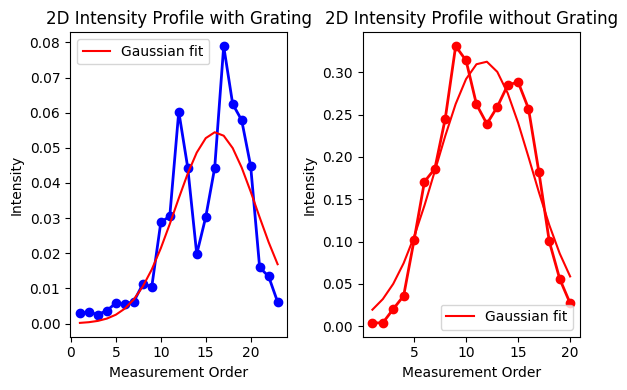

In [11]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))

ax1.plot(range(1, 24), max_df['max'], 'bo-', linewidth=2, markersize=6)
ax1.set_xlabel('Measurement Order')
ax1.set_ylabel('Intensity')
ax1.set_title('2D Intensity Profile with Grating')

ax2.plot(range(1, 21), bmax_df['max'], 'ro-', linewidth=2, markersize=6)
ax2.set_xlabel('Measurement Order')
ax2.set_ylabel('Intensity')
ax2.set_title('2D Intensity Profile without Grating')

plt.tight_layout()
plt.show()

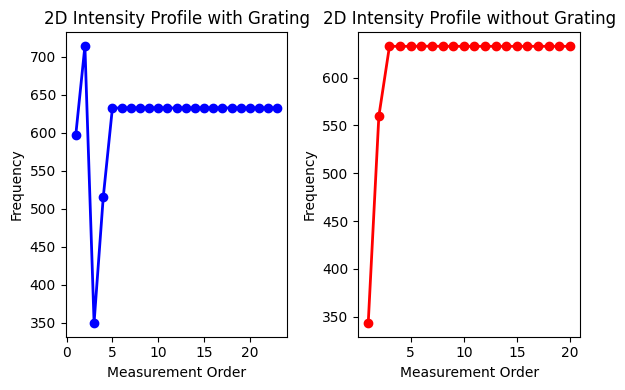

In [4]:
import matplotlib.pyplot as plt

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(6, 4))

ax3.plot(range(1, 24), max_df['frequency'], 'bo-', linewidth=2, markersize=6)
ax3.set_xlabel('Measurement Order')
ax3.set_ylabel('Frequency')
ax3.set_title('2D Intensity Profile with Grating')

ax4.plot(range(1, 21), bmax_df['frequency'], 'ro-', linewidth=2, markersize=6)
ax4.set_xlabel('Measurement Order')
ax4.set_ylabel('Frequency')
ax4.set_title('2D Intensity Profile without Grating')

plt.tight_layout()
plt.show()

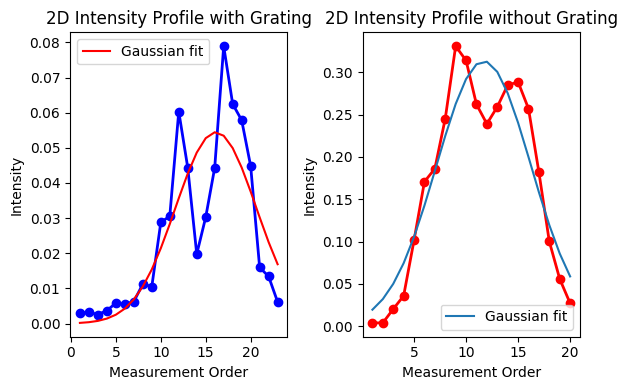

In [15]:
#Trying to apply a Gaussian fit to the data
from scipy.optimize import curve_fit

# Define a Gaussian function
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev) ** 2)

# Fit a Gaussian curve to the data
xdata = np.arange(1, 24)
ydata = max_df['max']
popt, _ = curve_fit(gaussian, xdata, ydata, p0=[max(ydata), np.mean(xdata), np.std(xdata)])

# Create a new figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))

# Plot the data and the fitted curve
ax1.plot(xdata, ydata, 'bo-', linewidth=2, markersize=6)
ax1.plot(xdata, gaussian(xdata, *popt), 'r-', label='Gaussian fit')
ax1.set_xlabel('Measurement Order')
ax1.set_ylabel('Intensity')
ax1.set_title('2D Intensity Profile with Grating')
ax1.legend()

# Fit a Gaussian curve to the second data set
xdata2 = np.arange(1, 21)
ydata2 = bmax_df['max']
popt2, _ = curve_fit(gaussian, xdata2, ydata2, p0=[max(ydata2), np.mean(xdata2), np.std(xdata2)])

# Plot the second data set and the fitted curve
ax2.plot(xdata2, ydata2, 'ro-', linewidth=2, markersize=6)
ax2.plot(xdata2, gaussian(xdata2, *popt2), label='Gaussian fit')
ax2.set_xlabel('Measurement Order')
ax2.set_ylabel('Intensity')
ax2.set_title('2D Intensity Profile without Grating')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Find the peak of the curve
max_value = max(max_df['max'])
max_index = np.argmax(max_df['max']) + 1

# Find the half maximum value
half_max = max_value / 2

# Find the FWHM points
left_index = np.argmin(abs(max_df['max'][:max_index] - half_max))
right_index = np.argmin(abs(max_df['max'][max_index:] - half_max)) + max_index

# Calculate the FWHM value
fwhm = right_index - left_index
print(left_index)
print(right_index)
print("FWHM:", fwhm)

